Andrew Pan

Computational Bayesian Statistics Report 1

Licensed under Creative Commons Attribution 4.0 International Public License

# Bayes Theorem Problems

## M&M Problem

The blue M&M was introduced in 1995.  Before then, the color mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan).  Afterward it was (24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown). 

A friend of mine has two bags of M&Ms, and he tells me that one is from 1994 and one from 1996.  He won't tell me which is which, but he gives me one M&M from each bag.  One is yellow and one is green.  What is the probability that the yellow M&M came from the 1994 bag?

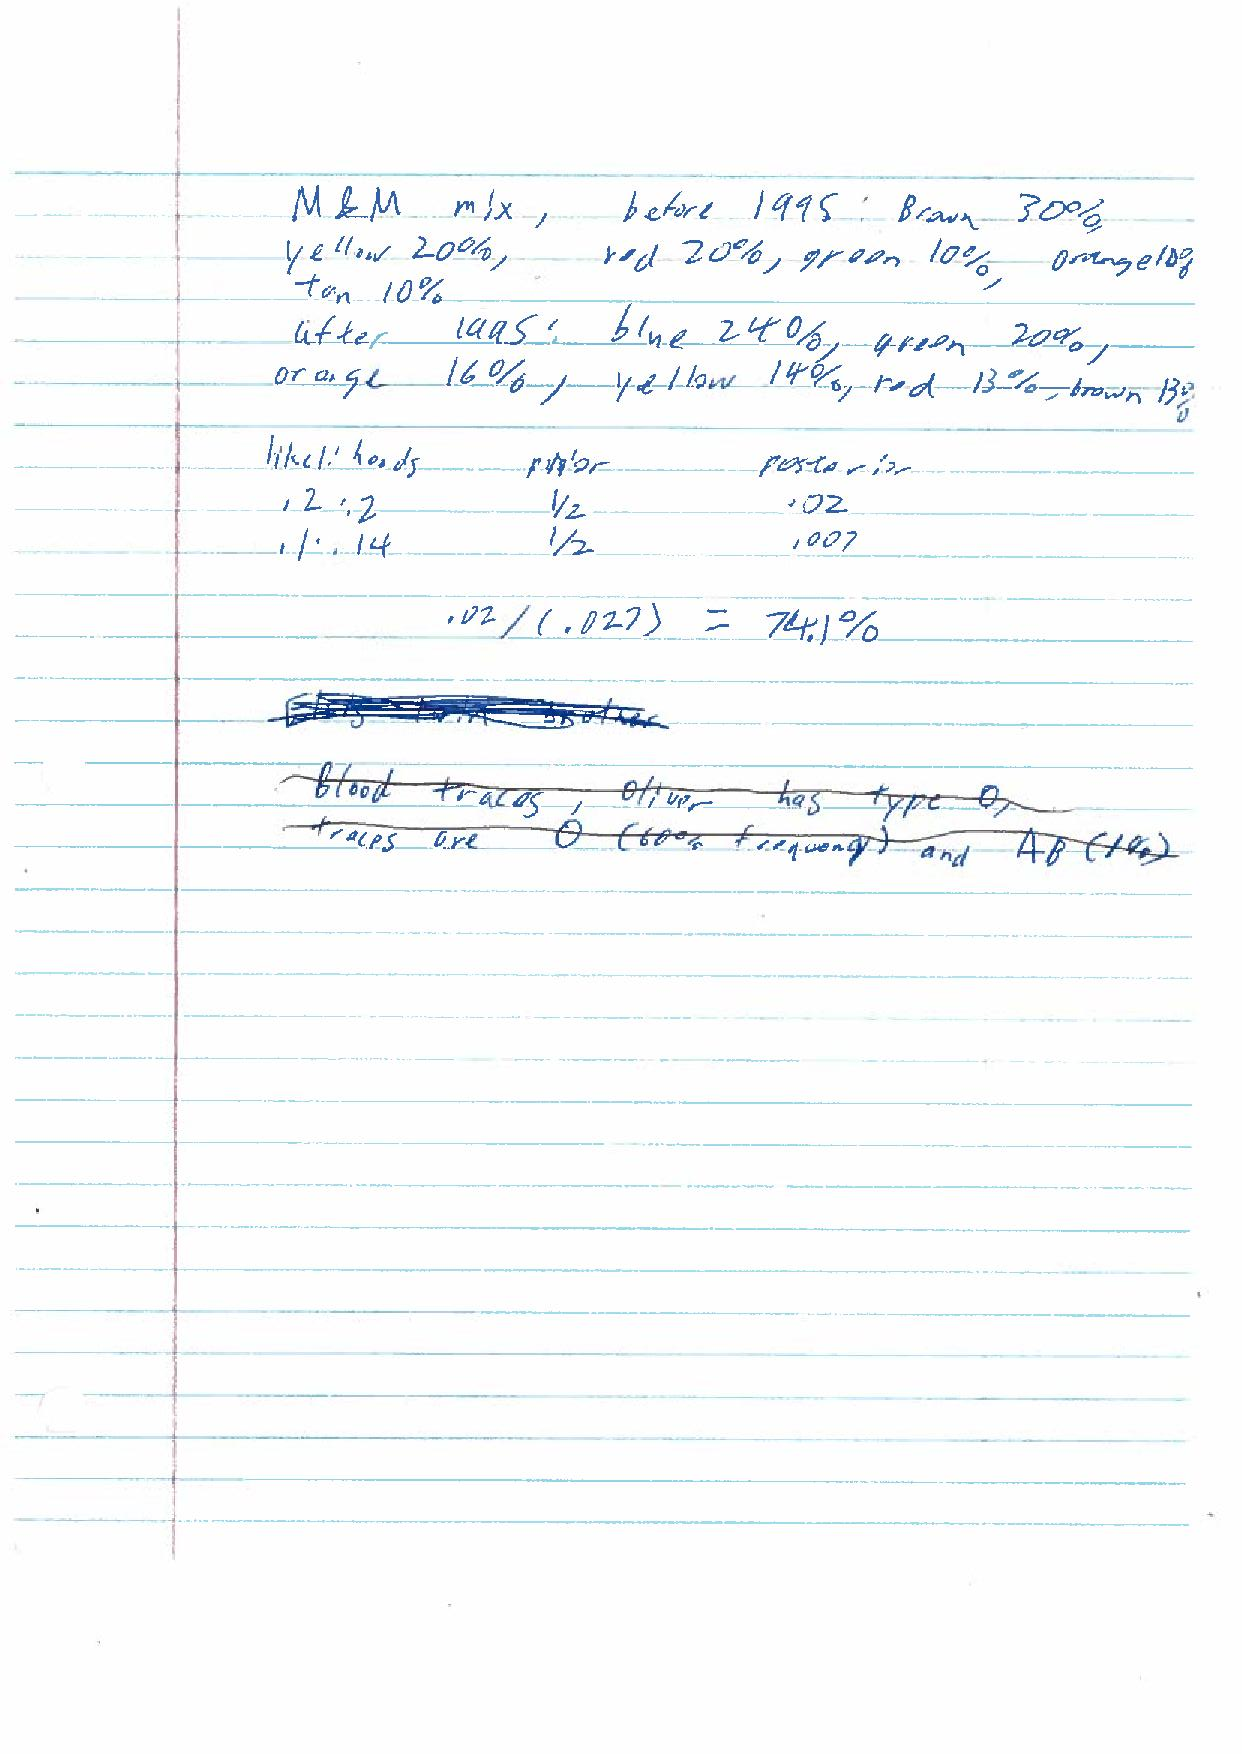

In [3]:
from IPython.display import Image
Image(filename='problems.jpg')

## Zombieland Problem

The fictional university of ZombieLand - has n students volunteer for the role of Killing Assistants, student volunteers who help in smooth killing of zombies in the campus. Every student can either manage to shoot a zombie or miss it.

Out of these n Killing Assistants, m students try to shoot the zombie fairly, that is, they are unbiased, while the rest of them are biased. The probability that a zombie will be hit by a shot if the Killing Assistant is biased is 2/3, otherwise the probability is 1/2.

Little Harry figures out this mess by selecting a Killing Assistant randomly. He tricks that particular Killing Assistant in shooting the same zombie twice. The first time, the Killing Assistant shoots the zombie, while the other time, he ends up missing it.

Harry wants to know what are the chances that the selected Killing Assistant was NOT biased.

In [1]:
# To get a constant answer, we will attempt to solve this problem in the case where m/n = 1/2.
# Because there is a 50% chance of the Killing Assistant being biased, we can set the priors for both hypotheses
# (biased and unbiased) to 0.5

import thinkbayes2
prior = thinkbayes2.Suite({'Biased': 0.5, 'Unbiased': 0.5})

# The Killing Assistant shot the zombie twice, hitting first then missing.  For a biased Assistant, the likelihood of 
# this event would be 2/3 * 1/3 = 1/9, as biased assistants have a 2/3 chance of hitting their target zombie.  An
# unbiased Assistant has a likelihood of 1/2 * 1/2 = 1/4.
likelihood = {'Biased': 2/9, 'Unbiased': 1/4}

# In order to solve this problem, we simply multiply the values of the prior and likelihoods together and normalize the
# resulting values to get the probability of the Killing Assistant in this event being biased.
posterior = prior.Copy()
for item in posterior:
    posterior[item] *= likelihood[item]
posterior.Normalize()
posterior.Print()

Biased 0.47058823529411764
Unbiased 0.5294117647058824


### General Solution

To solve this Zombieland problem for arbitrary values of n and m, we can use the same method as above except adjusting the prior values for Biased and Unbiased according to the ratio of m/n, such that Unbiased = m/n and Biased = (1-m/n).  Multiplying these values with the likelihoods gives us posteriors of Biased = (2/9 - 2m/9n) and Unbiased = m/4n.  Again, these values must be normalized, giving us final probabilities of:

Biased = (2/9 - 2m/9n)/(2/9 - 2m/9n + m/4n)

Unbiased = (m/4n)/(2/9 - 2m/9n + m/4n) = m/(8n/9 - 8m/9 + m)

## Original Bayes Theorem Problem

In Pallet Town, Pokemon Go is the favorite pastime of the town residents.  The residents have identified that there are 20 Pokemon spawn locations within the town.  One such spawn location, the town hall, has a 10% chance of spawning a Snorlax, while the rest have a 2% chance.  Spawn locations create a Pokemon once an hour, and the Pokemon remain catchable for 15 minutes after they spawn. If little Ash Ketchum says that he caught a Snorlax in Pallet Town at some point within the last hour and did not catch any other Pokemon, what is the probability that he caught it from the town hall spawn?

In [2]:
# To solve this problem, we will use the Suite class from the thinkbayes2 package to input our information on priors and 
# likelihoods that will be used with Bayes' Theorem.
# Our prior knowledge is that the town hall has a 10% chance of spawning a Snorlax, while all other spanws have a 2% 
# chance.

import thinkbayes2
prior = thinkbayes2.Suite({'Town hall': .1, 'Other': .02})

# Ash Ketchum did not specify what spawn location he caught his Snorlax from, so assuming that he has an equal chance of
# being anywhere in Pallet Town at given point in time, the likelihood of him being at the town hall spawn is 1/20, and
# the likelihood of being at other spawns is 19/20.

likelihood = {'Town hall': 1/20, 'Other': 19/20} # This will work in Python 3, but Python 2 requires casting as a float

# To calculate the posterior, we need to multiply the prior and likelihood values together and normalize the results

posterior = prior.Copy()
for item in posterior:
    posterior[item] *= likelihood[item]
posterior.Normalize()
posterior.Print()

Other 0.7916666666666666
Town hall 0.20833333333333331


And thus the probability that Ash caught his Snorlax at the town hall is about 21%